CIFAR10 데이터셋을 이미지 분류 

컴퓨터 비전 분야에서 딥러닝을 통해 

가장 처음에 고안된 방안인

이미지 분류를 진행해보자!

CIFAR 10 데이터셋은 

3*32*32 픽셀의 60000개의 컬러이미지(RGB) 데이터셋이다.

클래스의 개수는 10개이며 

비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭이 있다.

보통 50000개는 훈련, 10000개는 테스트데이터셋으로 구성하는 편이다.

* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computuer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transform` - functions for manipulating your vision data (images) to be suitable foruse with an ML model
* `torch.utils.data.Dataset` - Base dataset class for Pytorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import torch
import torchvision # 컴퓨터 비전에 필요한 패키징

from torchvision import datasets # Image 데이터셋이 있는곳
from torchvision import transforms # 이미지 전처리(Crop, 어파인 변환 이런게 있는거 같던데)
from torch.utils.data import Dataset # 데이터셋 클래스 상속할 때 쓰는 기반클래스
from torch.utils.data import DataLoader # dataset을 iterable할 수 있게하는 Dataloader

import matplotlib.pyplot as plt
# agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device) # gpu 사용

c:\Users\hyssk\anaconda3\envs\Pytorch_Project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [2]:
# 1. Getting Data (데이터셋 가져오기)

train_dataset=datasets.CIFAR10(root='Data',
                               train=True,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=True)
test_dataset=datasets.CIFAR10(root='Data',
                              train=False,
                              transform=transforms.ToTensor(),
                              target_transform=None,
                              download=True)



100%|██████████| 170498071/170498071 [00:53<00:00, 3166475.26it/s]


Extracting Data\cifar-10-python.tar.gz to Data
Files already downloaded and verified


In [3]:
# datasets.CIFAR10를 참조한 train_dataset에 대해 확인하기
print(train_dataset)
print(dir(train_dataset)) # 클래스에 부여된 속성 또는 메소드를 확인할 수 있다. 'class_to_idx', 'classes'
print(len(train_dataset))

print(train_dataset.class_to_idx) # 딕셔너리 형태
print(train_dataset.classes) # 리스트 형태 

print(train_dataset.__getitem__(0)) # 인덱스 0번의 값 출력, 튜플 형태 (텐서정보(3*32*32),클래스넘버) 정보 전달


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()
['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_integrity', '_format_transform_repr', '_is_protocol', '_load_meta', '_repr_indent', 'base_folder', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'filename', 'meta', 'root', 'target_transform', 'targets', 'test_list', 'tgz_md5', 'train', 'train_list', 'transform', 'transforms', 'url']
50000
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'sh

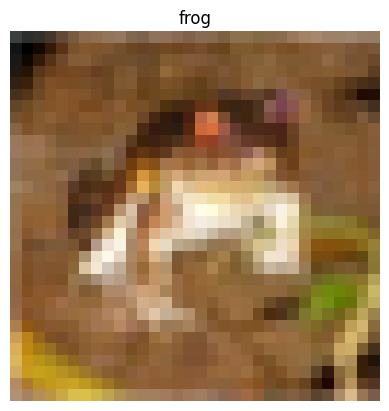

In [4]:
# 데이터셋 추출 후 시각화 해보기

plt.figure()
plt.imshow(train_dataset.__getitem__(0)[0].permute(1,2,0)) # torch의 텐서와 matplotlib의 rgb 순서가 달라서 변환해줘야함.
plt.title(train_dataset.classes[train_dataset.__getitem__(0)[1]])
plt.axis(False)
plt.show()

In [5]:
# 랜덤으로 10개 정도 그려보기
import random

random_idx = random.randint(a=0, b=len(train_dataset))
print(random_idx)

34917
